<h1 align="center">CAS EDA</h1>

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
sns.set_theme()

## Importing data

In [2]:
cas= pd.read_csv('CAS.csv')
pd.set_option('display.max_columns',None)
cas.head()

,X,Y,OBJECTID,advisorySpeed,areaUnitID,bicycle,bridge,bus,carStationWagon,cliffBank,crashDirectionDescription,crashFinancialYear,crashLocation1,crashLocation2,crashRoadSideRoad,crashSeverity,crashSHDescription,crashYear,debris,directionRoleDescription,ditch,fatalCount,fence,flatHill,guardRail,holiday,houseOrBuilding,intersection,kerb,light,meshblockId,minorInjuryCount,moped,motorcycle,NumberOfLanes,objectThrownOrDropped,otherObject,otherVehicleType,overBank,parkedVehicle,pedestrian,phoneBoxEtc,postOrPole,region,roadCharacter,roadLane,roadSurface,roadworks,schoolBus,seriousInjuryCount,slipOrFlood,speedLimit,strayAnimal,streetLight,suv,taxi,temporarySpeedLimit,tlaId,tlaName,trafficControl,trafficIsland,trafficSign,train,tree,truck,unknownVehicleType,urban,vanOrUtility,vehicle,waterRiver,weatherA,weatherB
0,1772561.0,5896382.0,1,NaN,525420.0,0.0,NaN,0.0,1.0,NaN,Null,2007/2008,EAST ST,ELLIOT ST,NaN,Non-Injury Crash,No,2007,NaN,North,NaN,0.0,NaN,Flat,NaN,NaN,NaN,NaN,NaN,Dark,791600.0,0.0,0.0,0.0,2.0,NaN,NaN,0.0,NaN,NaN,NaN,NaN,NaN,Auckland Region,Nil,2-way,Sealed,NaN,0.0,0.0,NaN,50.0,NaN,On,1.0,0.0,NaN,76.0,Auckland,Traffic Signals,NaN,NaN,NaN,NaN,0.0,0.0,Urban,0.0,NaN,NaN,Fine,Null
1,1836757.0,5859311.0,3,NaN,534300.0,0.0,NaN,0.0,2.0,NaN,Null,2002/2003,SH 2,SH 26,NaN,Non-Injury Crash,Yes,2003,NaN,North,NaN,0.0,NaN,Flat,NaN,NaN,NaN,NaN,NaN,Dark,1073700.0,0.0,0.0,0.0,2.0,NaN,NaN,0.0,NaN,NaN,NaN,NaN,NaN,Waikato Region,Nil,2-way,Sealed,NaN,0.0,0.0,NaN,50.0,NaN,On,0.0,0.0,NaN,12.0,Hauraki District,Give way,NaN,NaN,NaN,NaN,0.0,0.0,Urban,0.0,NaN,NaN,Fine,Frost
2,1762088.0,5912507.0,4,NaN,519500.0,0.0,NaN,0.0,1.0,NaN,West,2009/2010,CHURCH ST,HUGO JOHNSTON DRIVE,NaN,Non-Injury Crash,No,2010,NaN,East,NaN,0.0,NaN,Flat,NaN,Queens Birthday,NaN,NaN,NaN,Bright sun,622400.0,0.0,0.0,0.0,2.0,NaN,NaN,0.0,NaN,NaN,NaN,NaN,NaN,Auckland Region,Nil,2-way,Sealed,NaN,0.0,0.0,NaN,50.0,NaN,Off,0.0,0.0,NaN,76.0,Auckland,Traffic Signals,NaN,NaN,NaN,NaN,0.0,0.0,Urban,1.0,NaN,NaN,Fine,Null
3,1753522.0,5911939.0,6,NaN,518902.0,0.0,NaN,0.0,2.0,NaN,Null,2017/2018,THE AVENUE,ACCESSWAY,NaN,Minor Crash,No,2017,NaN,North,NaN,0.0,NaN,Hill Road,NaN,NaN,NaN,NaN,NaN,Overcast,587500.0,1.0,0.0,0.0,2.0,NaN,NaN,0.0,NaN,NaN,NaN,NaN,NaN,Auckland Region,Nil,2-way,Sealed,NaN,0.0,0.0,NaN,50.0,NaN,Null,0.0,0.0,NaN,76.0,Auckland,Nil,NaN,NaN,NaN,NaN,0.0,0.0,Urban,0.0,NaN,NaN,Light rain,Null
4,1761364.0,5914259.0,7,NaN,520202.0,0.0,NaN,0.0,2.0,NaN,Null,2017/2018,PENROSE INT,GT SOUTH LINK,NaN,Non-Injury Crash,No,2018,NaN,North,NaN,0.0,NaN,Flat,NaN,NaN,NaN,NaN,NaN,Overcast,612300.0,0.0,0.0,0.0,2.0,NaN,NaN,0.0,NaN,NaN,NaN,NaN,NaN,Auckland Region,Motorway ramp,1-way,Sealed,NaN,0.0,0.0,NaN,50.0,NaN,Null,0.0,0.0,NaN,76.0,Auckland,Give way,NaN,NaN,NaN,NaN,0.0,0.0,Urban,0.0,NaN,NaN,Fine,Null


In [3]:
cas.shape

(776878, 72)

In [4]:
null_columns = cas.columns[cas.isnull().any()]
(cas[null_columns].isnull().sum()/len(cas))*100

advisorySpeed                96.229910
areaUnitID                    0.014932
bicycle                       0.000644
bridge                       60.034652
bus                           0.000644
carStationWagon               0.000644
cliffBank                    60.034652
crashLocation2                0.118551
crashRoadSideRoad           100.000000
crashSHDescription            0.000129
debris                       60.034652
directionRoleDescription      0.010169
ditch                        60.034652
fatalCount                    0.017506
fence                        60.034652
guardRail                    60.034652
holiday                      94.547664
houseOrBuilding              60.034652
intersection                100.000000
kerb                         60.034652
meshblockId                   0.014932
minorInjuryCount              0.017506
moped                         0.000644
motorcycle                    0.000644
NumberOfLanes                 0.197586
objectThrownOrDropped    

### Speed Limit

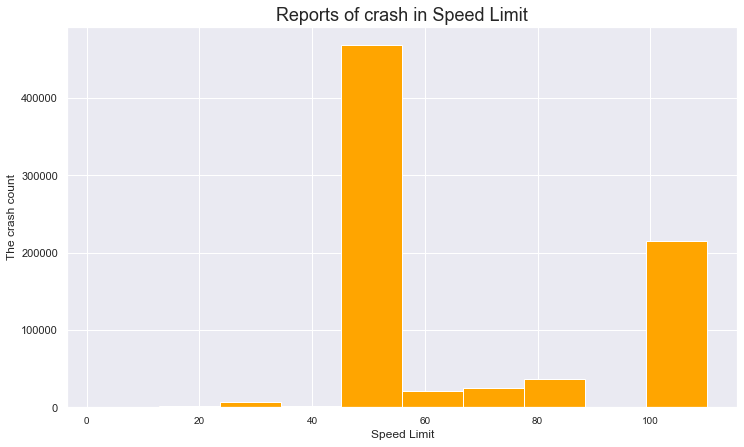

In [56]:
%matplotlib inline
import matplotlib as mpl
mpl.rc("savefig", dpi=1000)
plt.figure(figsize=(12,7))
plt.hist(cas['speedLimit'],label='Speed Limit', color = 'orange')
plt.title('Reports of crash in Speed Limit')
plt.xlabel('Speed Limit')
plt.ylabel('The crash count')
plt.savefig('speed1.png')

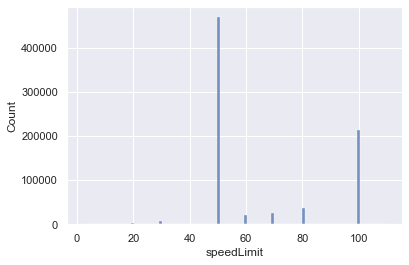

In [8]:
import seaborn as sns
sns.histplot(x="speedLimit",data=cas)
plt.show()

## Vehicles

In [9]:
cas_vehicles = pd.DataFrame(cas[['bicycle', 'bus', 'carStationWagon', 'moped', 'motorcycle', 'otherVehicleType', 'suv', 'schoolBus', 'taxi', 'train', 'truck', 'vanOrUtility', 'vehicle']])
cas_vehicles.replace(np.NaN,0,inplace= True)
cas_vehicles.head()

,bicycle,bus,carStationWagon,moped,motorcycle,otherVehicleType,suv,schoolBus,taxi,train,truck,vanOrUtility,vehicle
0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0
1,0.0,0.0,2.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
3,0.0,0.0,2.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,0.0,0.0,2.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


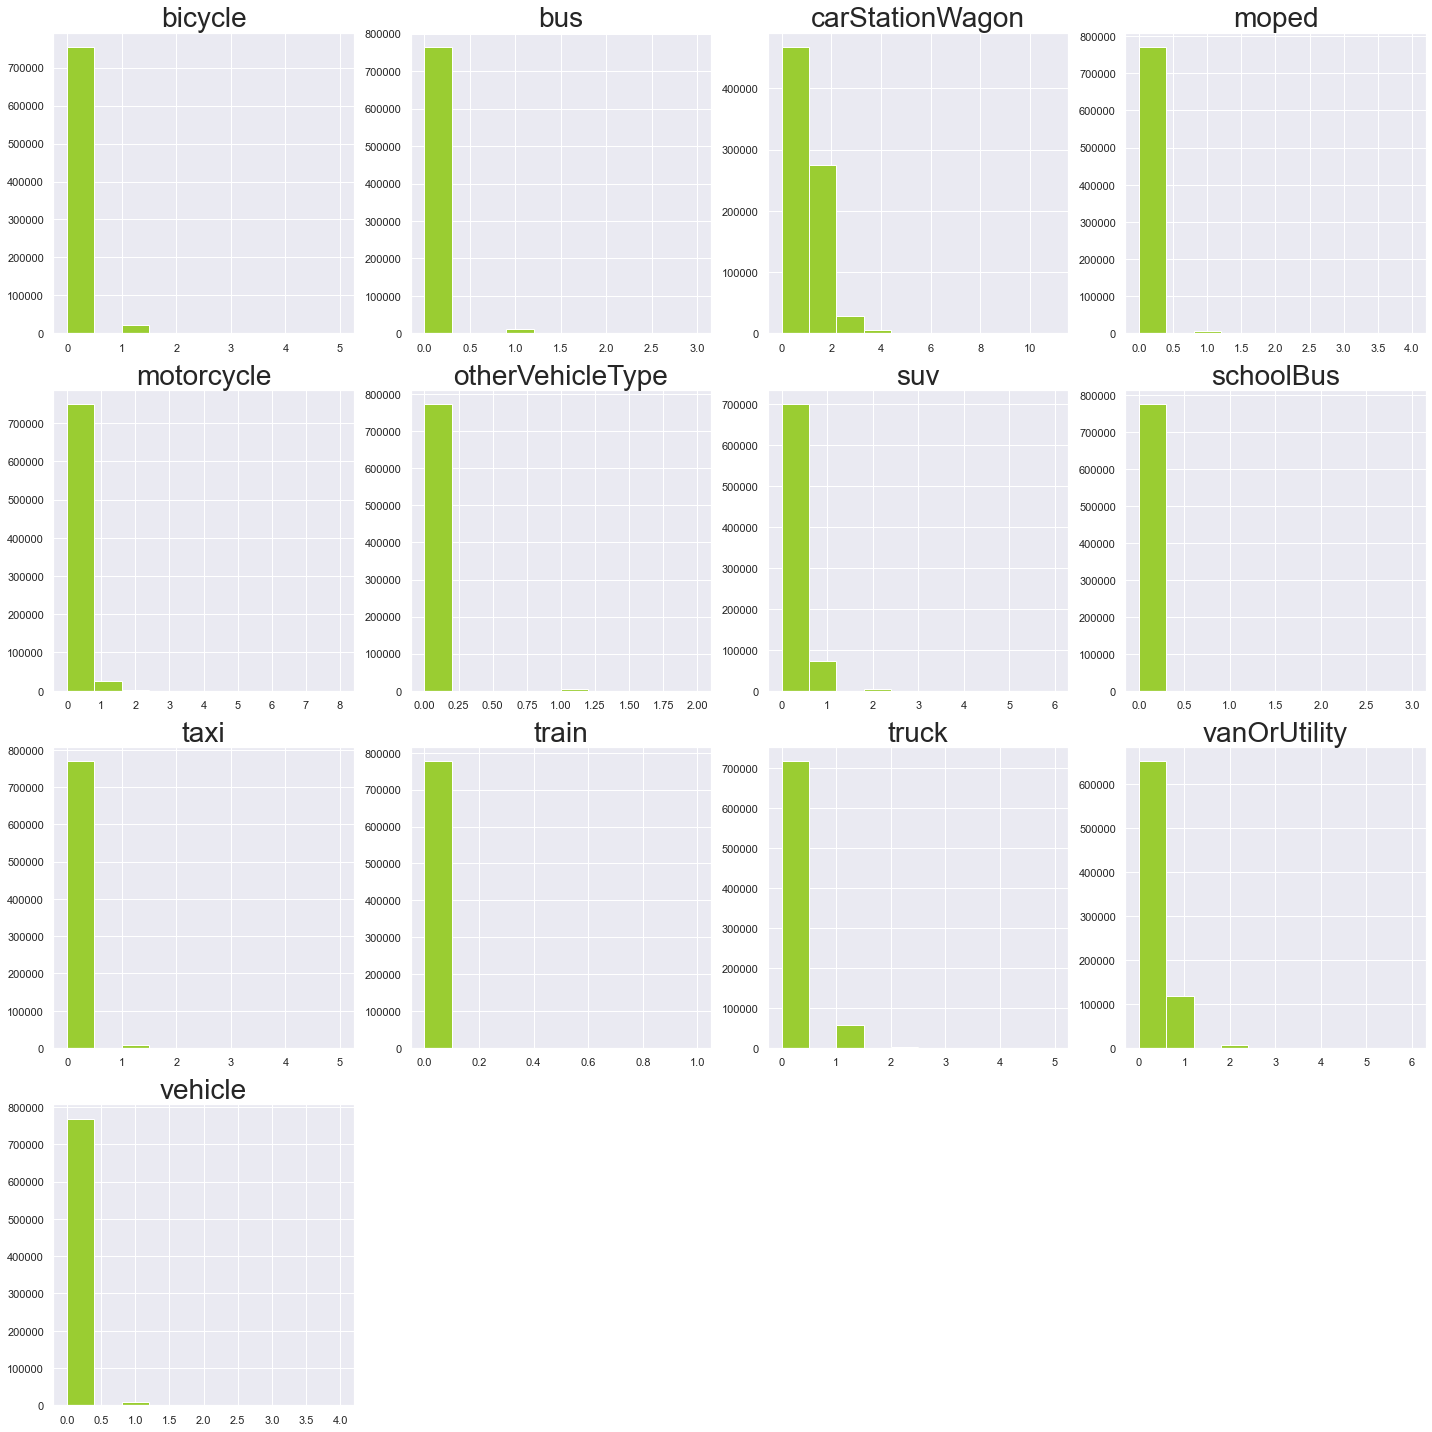

In [12]:
cas_vehicles.hist(figsize=(20,20), color = 'yellowgreen')
plt.tight_layout()
plt.rc('axes', titlesize=28)
plt.savefig('vehicles.png')

## Weather

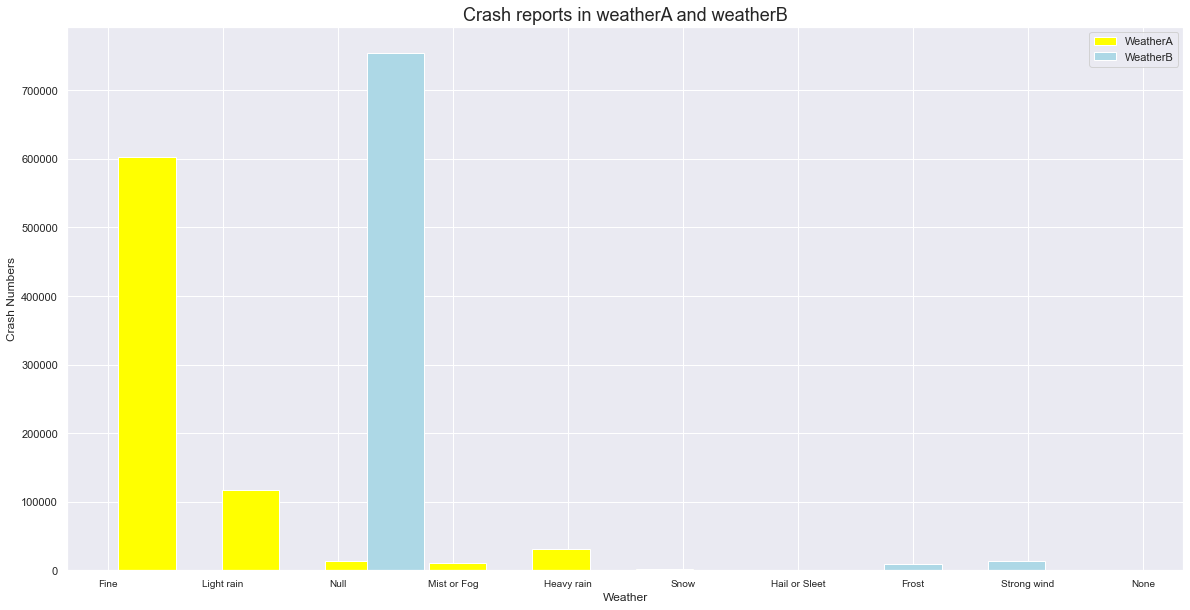

In [54]:
plt.rc('axes', titlesize=18)
plt.figure(figsize= (20,10))
plt.hist([cas['weatherA'], cas['weatherB']], label=['WeatherA', 'WeatherB'], color= ['yellow', 'lightblue'], bins= 10, width= .5)
plt.title('Crash reports in weatherA and weatherB')
plt.xlabel('Weather')
plt.ylabel('Crash Numbers')
plt.legend()
plt.savefig('weather.png')

## Speed

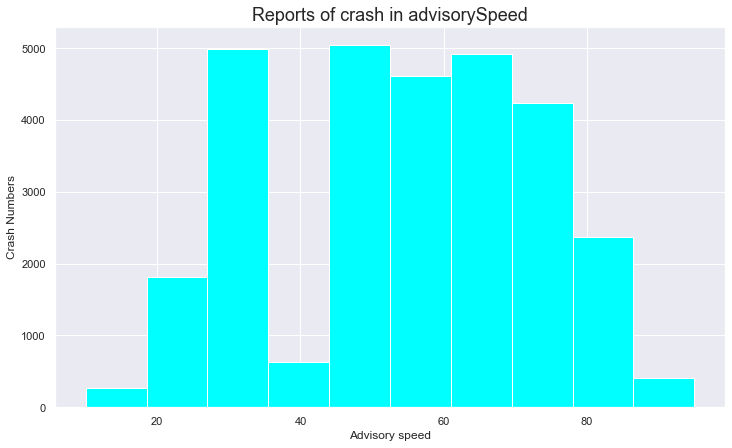

In [14]:
plt.figure(figsize=(12,7))
plt.hist(cas['advisorySpeed'], label= 'Advisory Speed', color= 'cyan')
plt.title('Reports of crash in advisorySpeed')
plt.xlabel('Advisory speed')
plt.ylabel('Crash Numbers')
plt.rc('axes', titlesize=18)
plt.savefig('adspeed.png')

## Regions

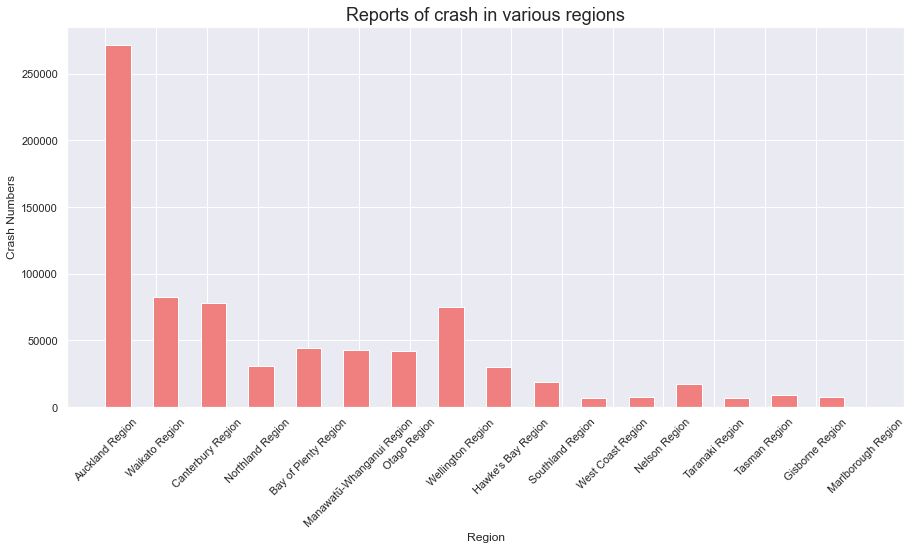

In [15]:
cas_region = cas.dropna(subset=['region'])
plt.figure(figsize= (15 ,7))
plt.hist(cas_region['region'],bins= 16,width= .5, color= 'lightcoral')
plt.xticks(rotation = 45 )
plt.xlabel('Region')
plt.ylabel('Crash Numbers')
plt.title('Reports of crash in various regions')
plt.savefig('regions.png')

## TLA name

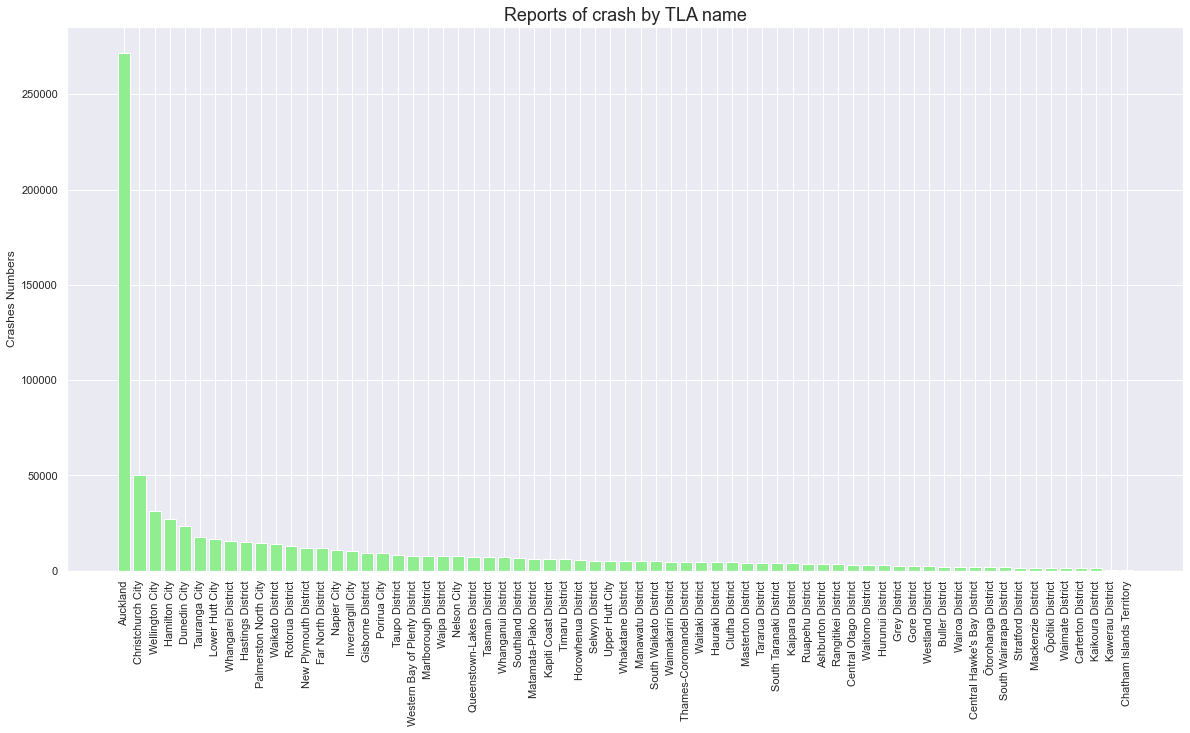

In [16]:
cas_tn = cas['tlaName'].value_counts()
plt.figure(figsize=(20,10))
plt.bar(cas_tn.index, cas_tn, color='lightgreen')
plt.xticks(rotation= 90)
plt.ylabel('Crashes Numbers')
plt.title('Reports of crash by TLA name')
plt.savefig('tlaname.png')

## Light

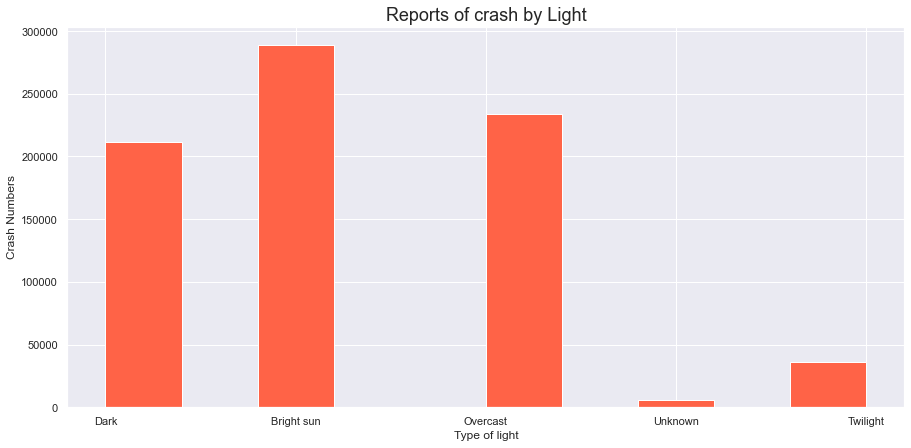

In [17]:
plt.figure(figsize= (15,7))
plt.hist(cas.light, color= 'tomato')
plt.xlabel('Type of light')
plt.ylabel('Crash Numbers')
plt.title('Reports of crash by Light')
plt.savefig('light.png')

## Roads

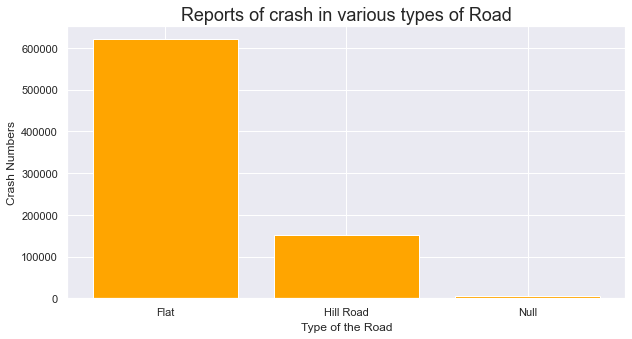

In [20]:
cas_fh = cas['flatHill'].value_counts()
plt.figure(figsize= (10 ,5))
plt.bar(cas_fh.index,cas_fh, color= 'orange')
plt.xlabel('Type of the Road')
plt.ylabel('Crash Numbers')
plt.title('Reports of crash in various types of Road')
plt.savefig('flathill.png')

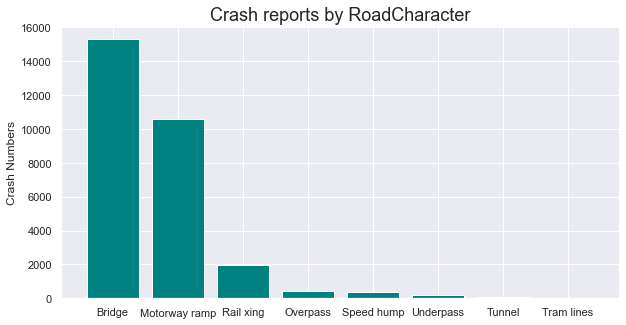

In [22]:
cas_rc = cas['roadCharacter'].value_counts().drop("Nil")
plt.figure(figsize= (10 ,5))
plt.bar(cas_rc.index,cas_rc, color= 'teal')
plt.ylabel('Crash Numbers')
plt.title('Crash reports by RoadCharacter')
plt.savefig('roadcharacter.png')

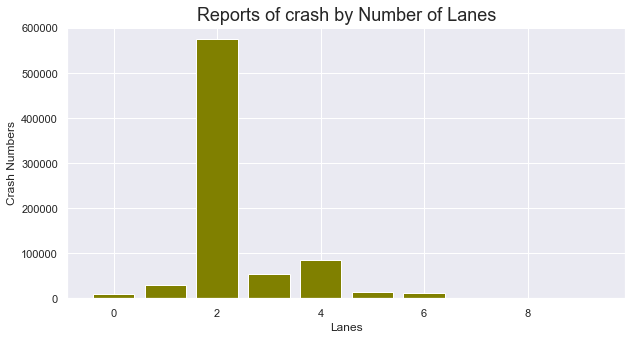

In [23]:
cas_l = cas['NumberOfLanes'].value_counts()
plt.figure(figsize= (10 ,5))
plt.bar(cas_l.index,cas_l, color= 'olive')
plt.xlabel('Lanes')
plt.ylabel('Crash Numbers')
plt.title('Reports of crash by Number of Lanes')
plt.savefig('Nooflanes.png')

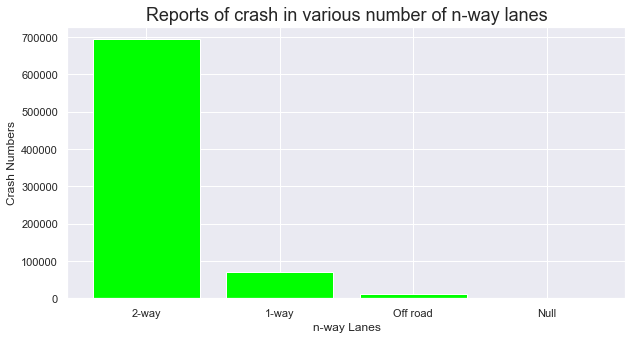

In [24]:
cas_rl = cas['roadLane'].value_counts()
plt.figure(figsize= (10 ,5))
plt.bar(cas_rl.index,cas_rl, color= 'lime')
plt.xlabel('n-way Lanes')
plt.ylabel('Crash Numbers')
plt.title('Reports of crash in various number of n-way lanes')
plt.savefig('roadlane.png')

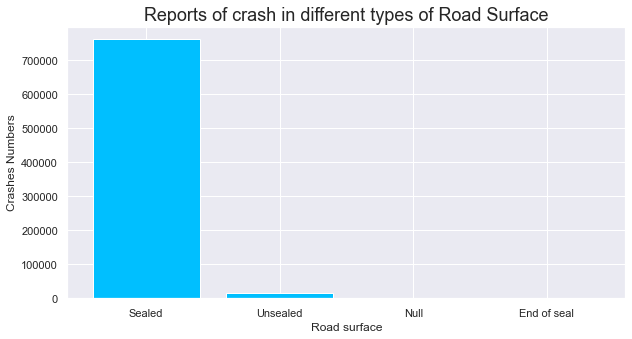

In [25]:
cas_rs = cas['roadSurface'].value_counts()
plt.figure(figsize= (10 ,5))
plt.bar(cas_rs.index,cas_rs, color= 'deepskyblue')
plt.xlabel('Road surface')
plt.ylabel('Crashes Numbers')
plt.title('Reports of crash in different types of Road Surface')
plt.savefig('roadsurface.png')

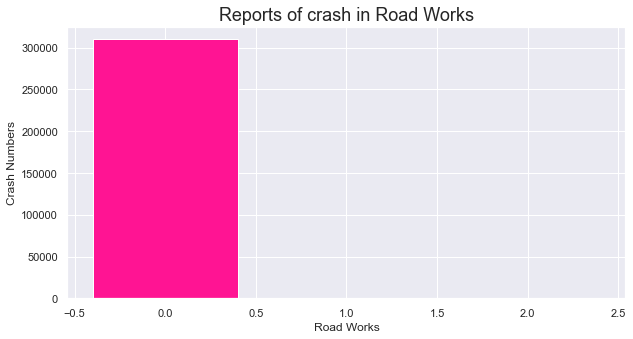

In [26]:
cas_rw = cas['roadworks'].value_counts()
plt.figure(figsize= (10 ,5))
plt.bar(cas_rw.index,cas_rw, color= 'deeppink')
plt.xlabel('Road Works')
plt.ylabel('Crash Numbers')
plt.title('Reports of crash in Road Works')
plt.savefig('roadworks.png')

In [27]:
cas_rw

0.0    309728
1.0       724
2.0        30
Name: roadworks, dtype: int64

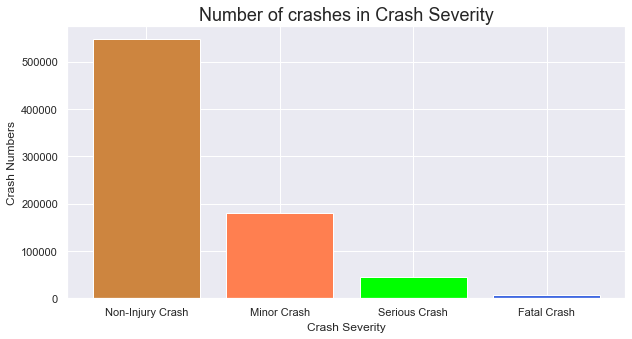

In [29]:
cas_cs =cas['crashSeverity'].value_counts()
plt.figure(figsize=(10,5))
plt.bar(cas_cs.index,cas_cs, color=['peru', 'coral', 'lime', 'royalblue'])
plt.xlabel('Crash Severity')
plt.ylabel('Crash Numbers')
plt.title('Number of crashes in Crash Severity')
plt.savefig('cs.png')

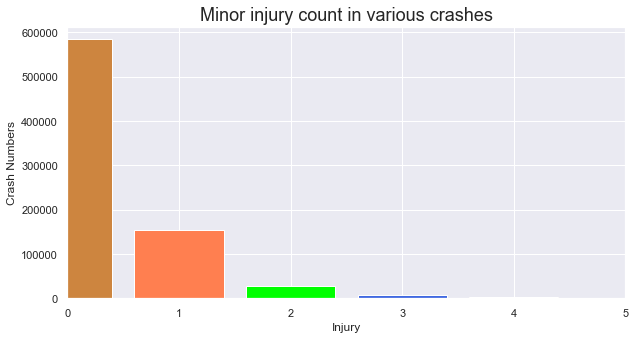

In [30]:
cas_mi =cas['minorInjuryCount'].value_counts()
plt.figure(figsize=(10,5))
plt.bar(cas_mi.index,cas_mi, color=['peru', 'coral', 'lime', 'royalblue'])
plt.xlabel('Injury')
plt.ylabel('Crash Numbers')
plt.title('Minor injury count in various crashes')
plt.xlim(0,5)
plt.savefig('minor.png')

### Serious Injury count

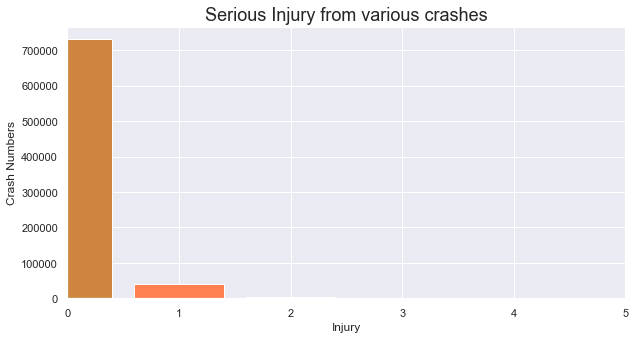

In [31]:
cas_si =cas['seriousInjuryCount'].value_counts()
plt.figure(figsize=(10,5))
plt.bar(cas_si.index,cas_si, color=['peru', 'coral', 'lime', 'royalblue'])
plt.xlabel('Injury')
plt.ylabel('Crash Numbers')
plt.title('Serious Injury from various crashes')
plt.xlim(0,5)
plt.savefig('serious.png')

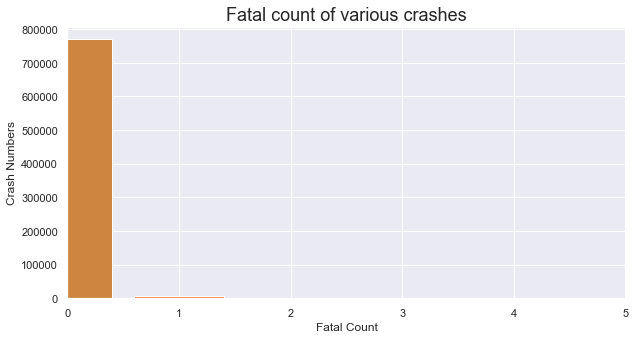

In [32]:
cas_fc =cas['fatalCount'].value_counts()
plt.figure(figsize=(10,5))
plt.bar(cas_fc.index,cas_fc, color=['peru', 'coral', 'lime', 'royalblue'])
plt.xlabel('Fatal Count')
plt.ylabel('Crash Numbers')
plt.title('Fatal count of various crashes')
plt.xlim(0,5)
plt.savefig('fatal.png')

## Crash Year

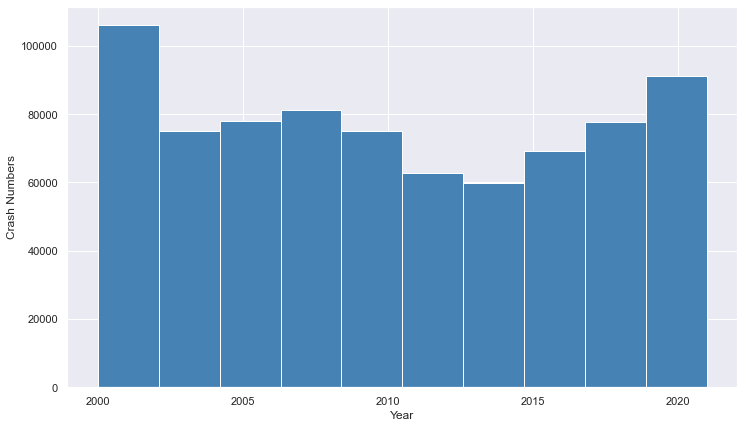

In [33]:
plt.figure(figsize=(12,7))
plt.hist(cas['crashYear'],color=['steelblue'])
plt.xlabel('Year')
plt.ylabel('Crash Numbers')
plt.savefig('crashyear.png')

## Crash Financial year

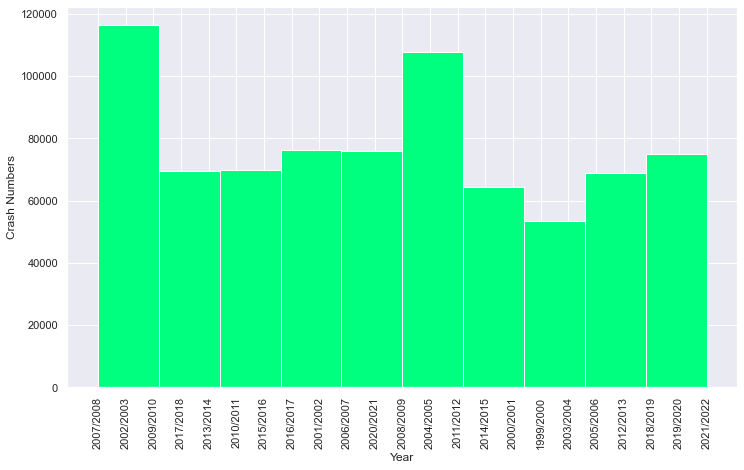

In [34]:
plt.figure(figsize=(12,7))
plt.hist(cas['crashFinancialYear'],color= 'springgreen')
plt.xticks(rotation= 90)
plt.xlabel('Year')
plt.ylabel('Crash Numbers')
plt.savefig('crashfinyear.png')

## Crash Direction Description

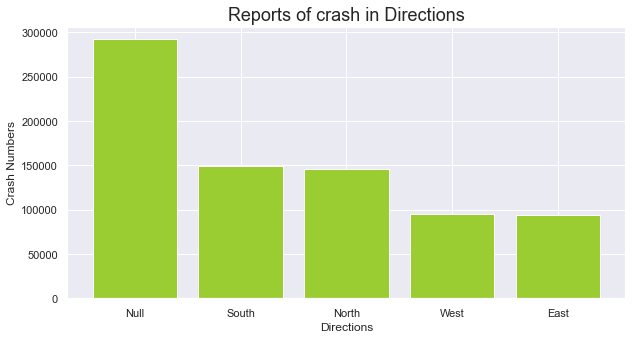

In [35]:
cas_dr = cas['crashDirectionDescription'].value_counts()
plt.figure(figsize= (10 ,5))
plt.bar(cas_dr.index,cas_dr, color= 'yellowgreen')
plt.xlabel('Directions')
plt.ylabel('Crash Numbers')
plt.title('Reports of crash in Directions')
plt.savefig('dir.png')

## Crash Location

In [36]:
cas_cl = cas['crashLocation1'].value_counts()
cas_cl1 = pd.DataFrame(cas_cl)
cas_cl1.reset_index(inplace=True)
cas_cl1 = cas_cl1[cas_cl1['crashLocation1'] > 1000]
cas_cl1.head()

,index,crashLocation1
0,SH 1N,54779
1,SH 2,20636
2,SH 1S,17586
3,SH 3,10740
4,SH 6,9773


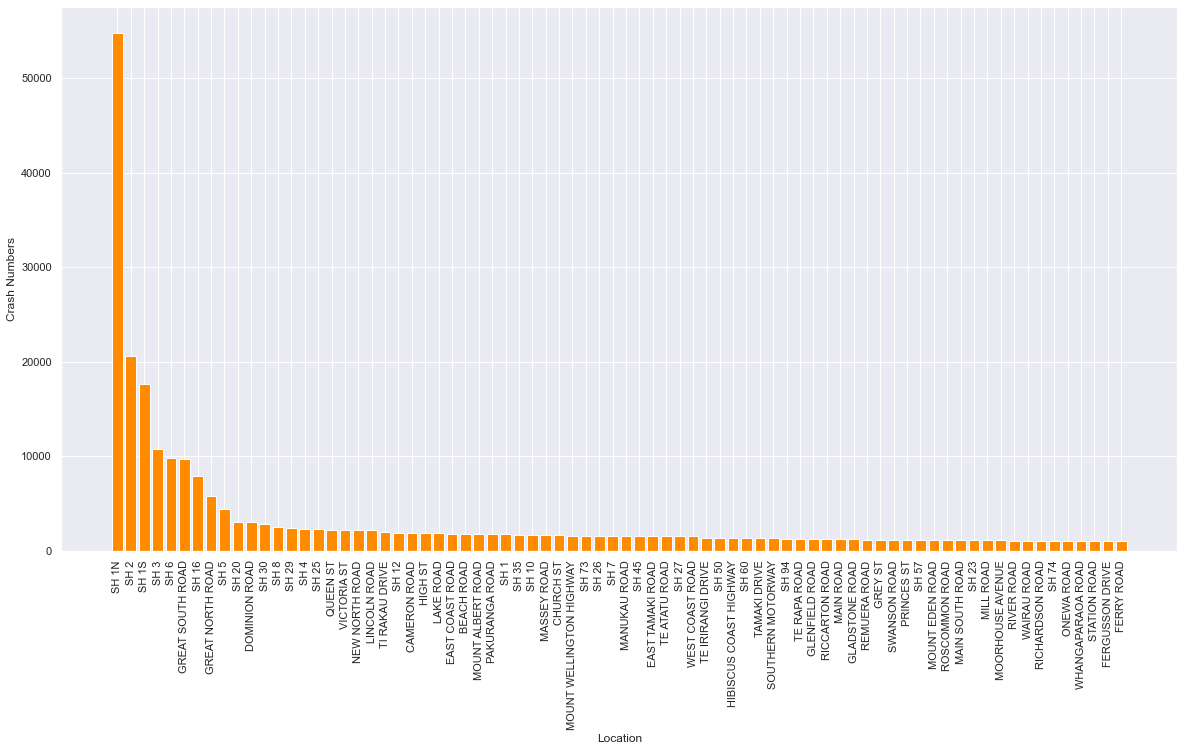

In [37]:
plt.figure(figsize=(20, 10))
plt.bar(cas_cl1['index'], cas_cl1['crashLocation1'] , color= 'darkorange')
plt.rc('xtick', labelsize= 10)
plt.xticks(rotation= 90)
plt.xlabel('Location')
plt.ylabel('Crash Numbers')
plt.savefig('loc1.png')

In [38]:
cas_cl = cas['crashLocation2'].value_counts()
cas_cl2 = pd.DataFrame(cas_cl)
cas_cl2.reset_index(inplace=True)
cas_cl2 = cas_cl2[cas_cl2['crashLocation2'] > 500]
cas_cl2.head()

,index,crashLocation2
0,SH 1N,3765
1,GREAT SOUTH ROAD,3170
2,SH 2,2287
3,QUEEN ST,1772
4,GREAT NORTH ROAD,1761


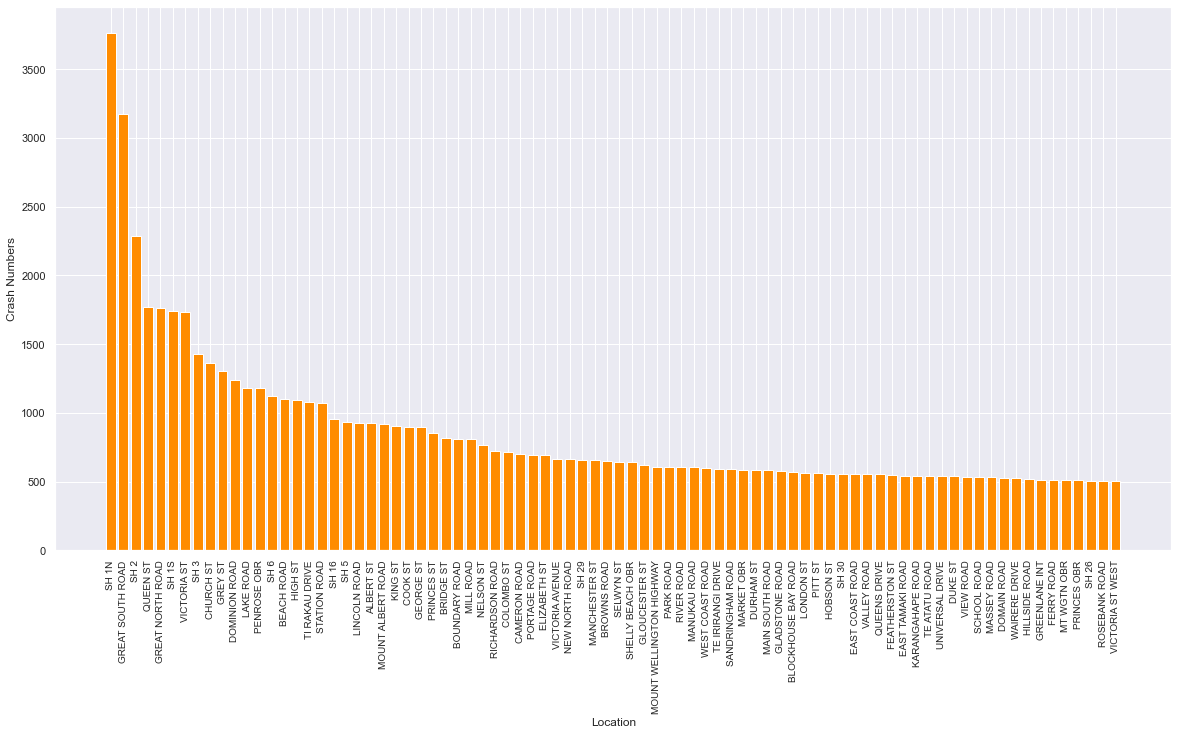

In [39]:
plt.figure(figsize=(20, 10))
plt.bar(cas_cl2['index'], cas_cl2['crashLocation2'] , color= 'darkorange')
plt.rc('xtick', labelsize= 10)
plt.xticks(rotation= 90)
plt.xlabel('Location')
plt.ylabel('Crash Numbers')
plt.savefig('loc2.png')

## Pedestrians and animals

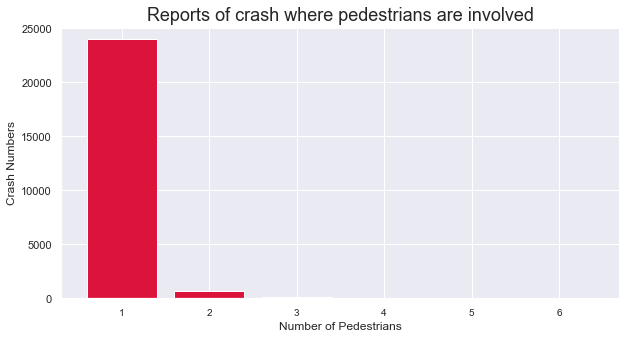

In [40]:
cas_p = cas['pedestrian'].value_counts()
plt.figure(figsize= (10 ,5))
plt.bar(cas_p.index,cas_p, color= 'crimson')
plt.xlabel('Number of Pedestrians')
plt.ylabel('Crash Numbers')
plt.title('Reports of crash where pedestrians are involved')
plt.savefig('pedestrians.png')

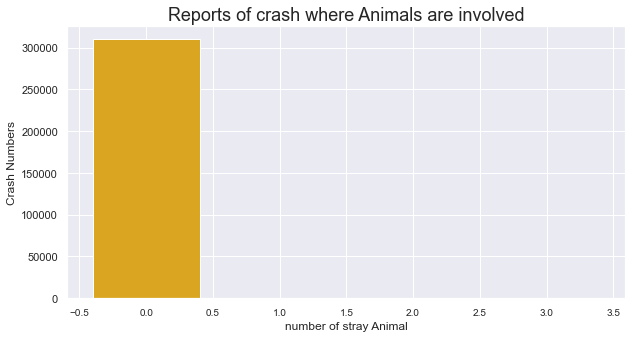

In [41]:
cas_sa = cas['strayAnimal'].value_counts()
plt.rc('axes', titlesize=18)
plt.figure(figsize= (10 ,5))
plt.bar(cas_sa.index,cas_sa, color= 'goldenrod')
plt.xlabel('number of stray Animal')
plt.ylabel('Crash Numbers')
plt.title('Reports of crash where Animals are involved')
plt.savefig('animal.png')

## Various objects involved in the crash

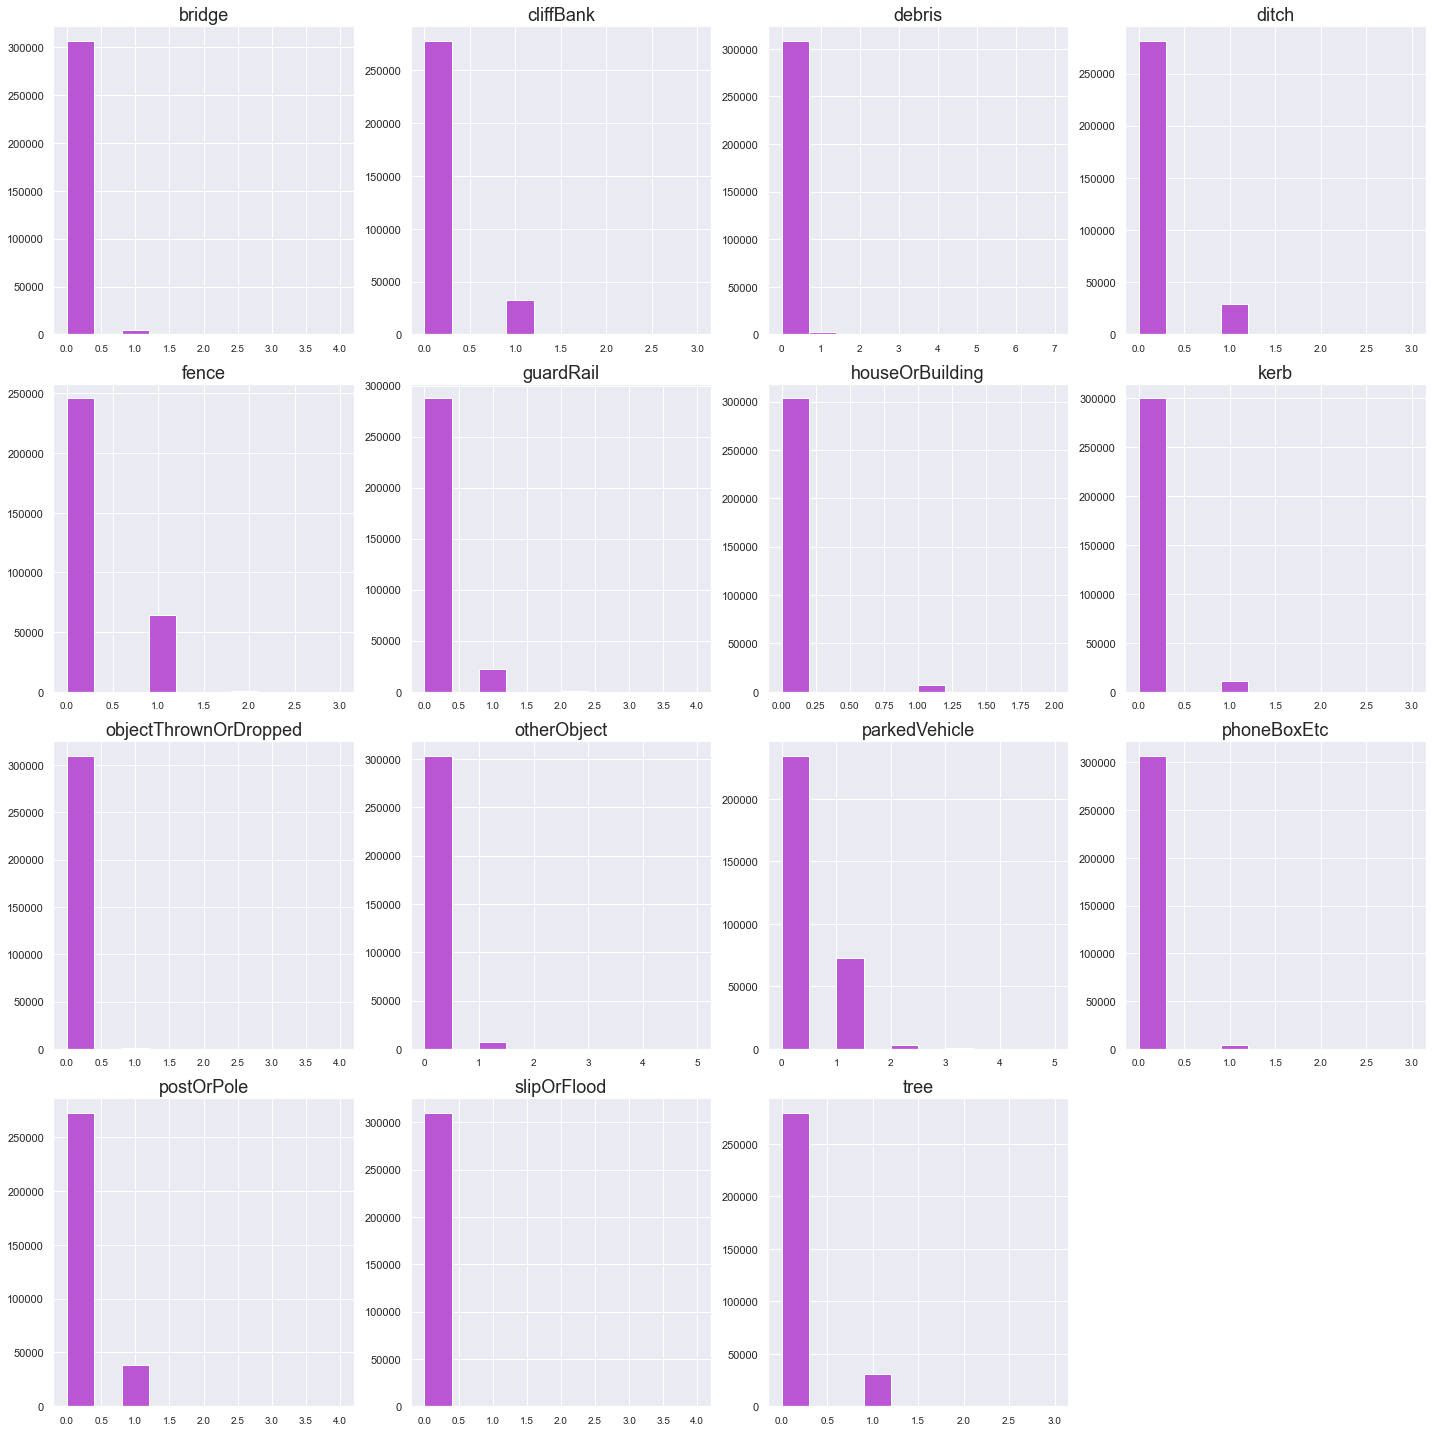

In [42]:
cas_objects = cas[['bridge', 'cliffBank' , 'debris', 'ditch', 'fence', 'guardRail',
              'houseOrBuilding', 'kerb' , 'objectThrownOrDropped',
              'otherObject', 'parkedVehicle', 'phoneBoxEtc', 'postOrPole', 
              'slipOrFlood', 'streetLight', 'tree']]
cas_objects.hist(figsize=(20,20), color = 'mediumorchid')
plt.rc('axes', titlesize=28)
plt.tight_layout()
plt.savefig('objects.png')

## Traffic 

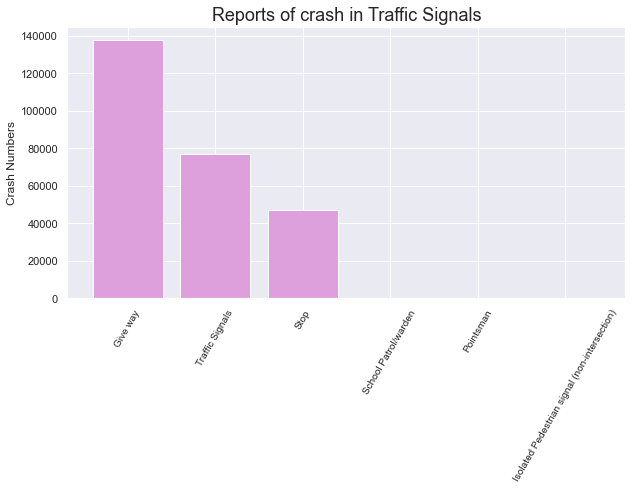

In [43]:
cas_tc = cas['trafficControl'].value_counts().drop(['Nil','Unknown'])
plt.figure(figsize= (10 ,5))
plt.rc('axes', titlesize=18)
plt.bar(cas_tc.index,cas_tc, color= 'plum')
plt.ylabel('Crash Numbers')
plt.xticks(rotation= 60)
plt.title('Reports of crash in Traffic Signals')
plt.savefig('trasignals.png')

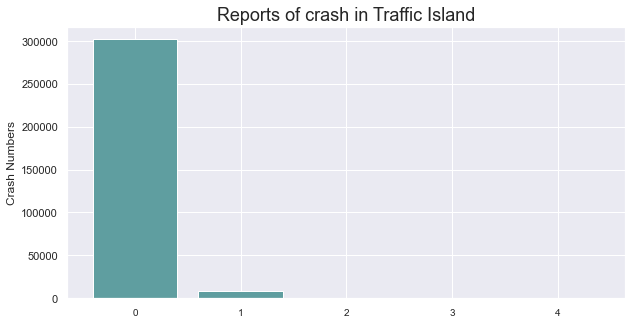

In [44]:
cas_ti = cas['trafficIsland'].value_counts()
plt.figure(figsize= (10 ,5))
plt.bar(cas_ti.index,cas_ti, color= 'cadetblue')
plt.ylabel('Crash Numbers')
plt.title('Reports of crash in Traffic Island')
plt.savefig('traisland.png')

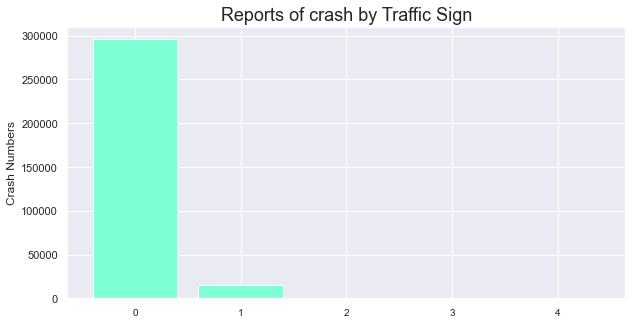

In [45]:
cas_ts = cas['trafficSign'].value_counts()
plt.figure(figsize= (10 ,5))
plt.bar(cas_ts.index,cas_ts, color= 'aquamarine')
plt.ylabel('Crash Numbers')
plt.title('Reports of crash by Traffic Sign')
plt.savefig('trasign.png')

## Water bodies and embankments 

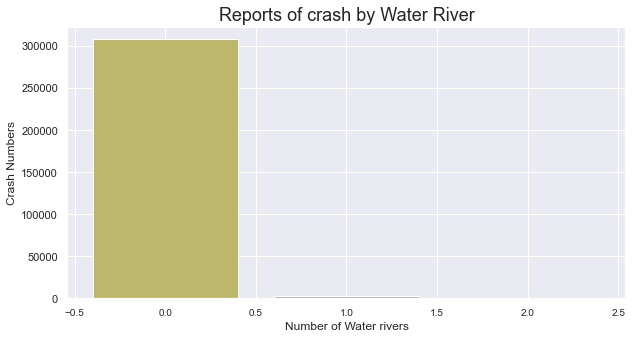

In [46]:
cas_wr = cas['waterRiver'].value_counts()
plt.figure(figsize= (10 ,5))
plt.bar(cas_wr.index,cas_wr, color= 'darkkhaki')
plt.xlabel('Number of Water rivers')
plt.ylabel('Crash Numbers')
plt.title('Reports of crash by Water River')
plt.savefig('water.png')

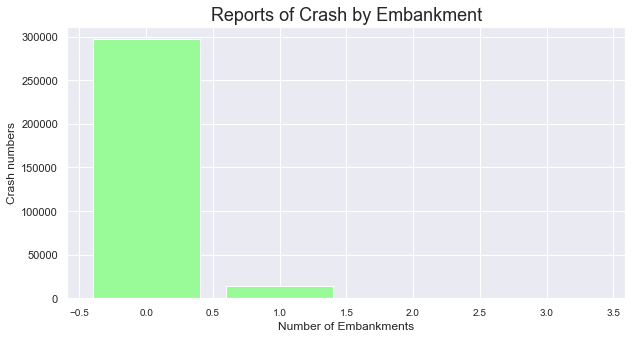

In [47]:
cas_ob = cas['overBank'].value_counts()
plt.figure(figsize= (10 ,5))
plt.bar(cas_ob.index,cas_ob, color= 'palegreen')
plt.xlabel('Number of Embankments')
plt.ylabel('Crash numbers')
plt.title('Reports of Crash by Embankment')
plt.savefig('embank.png')

## crash SH Description

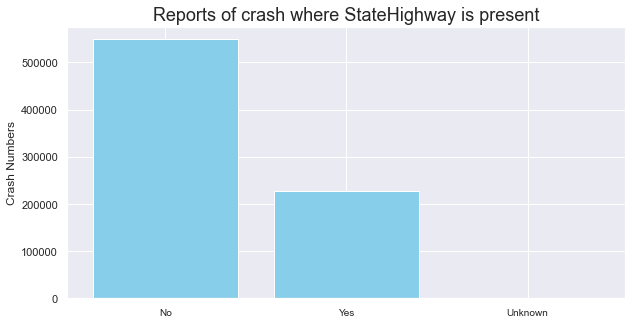

In [48]:
cas_cd = cas['crashSHDescription'].value_counts()
plt.figure(figsize= (10 ,5))
plt.bar(cas_cd.index,cas_cd, color= 'skyblue')
plt.ylabel('Crash Numbers')
plt.title('Reports of crash where StateHighway is present')
plt.savefig('statehighway.png')

## Direction Role Description

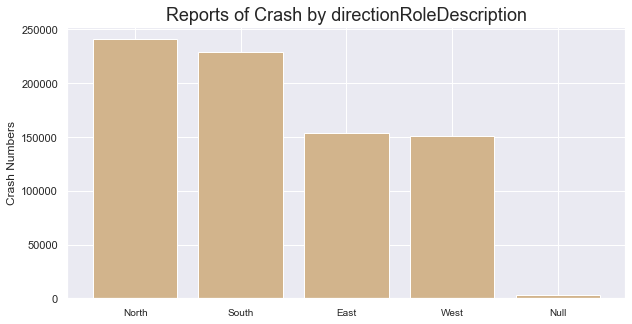

In [49]:
cas_drd = cas['directionRoleDescription'].value_counts()
plt.figure(figsize= (10 ,5))
plt.bar(cas_drd.index,cas_drd, color= 'tan')
plt.ylabel('Crash Numbers')
plt.title('Reports of Crash by directionRoleDescription')
plt.savefig('dirrole.png')

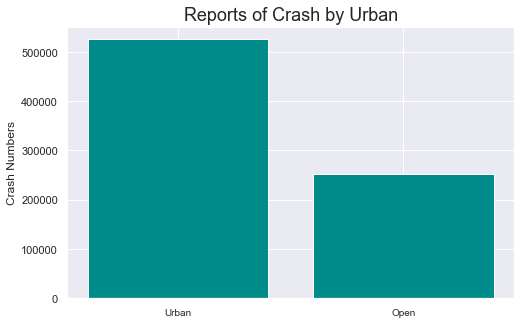

In [50]:
cas_u = cas['urban'].value_counts()
plt.figure(figsize= (8 ,5))
plt.bar(cas_u.index,cas_u, color= 'darkcyan')
plt.ylabel('Crash Numbers')
plt.title('Reports of Crash by Urban')
plt.savefig('urban.png')